In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import warnings
warnings.filterwarnings('ignore')

In [13]:
# sunpy data
# ! pip3 install sunpy
# ! pip3 install drms
# ! pip3 install sunpy zeep
# !pip3 install astropy
# !pip3 install --no-deps astropy-healpix
# !pip3 install shapely
# !pip3 install pytest-arraydiff

# !pip3 install reproject

In [14]:
import sunpy
import sunpy.map
import astropy.units as u
from sunpy.net import Fido, attrs as a

# VSO AIA

In [15]:
path = "AIA0304/"

In [16]:
files = sorted(os.listdir(path))

In [17]:
len(sorted(os.listdir(path)))

730

In [18]:
files[700]

'aia_lev1_304a_2012_12_16t00_00_07_12z_image_lev1.fits'

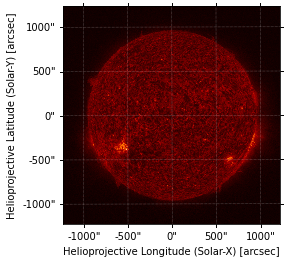

In [19]:
aia_map = sunpy.map.Map(path + files[400])
fig = plt.figure()
aia_map.plot()
plt.show()

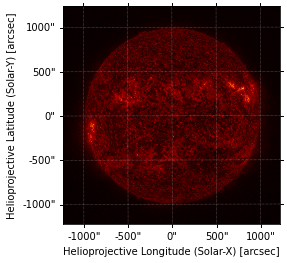

In [20]:
aia_map = sunpy.map.Map(path + files[700])
fig = plt.figure()
aia_map.plot()
plt.show()

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2012-12-16 00:00:07
Exposure Time,2.902064 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600165 0.600165] arcsec / pix
Reference Pixel,[2059.77002 2034.040039] pix

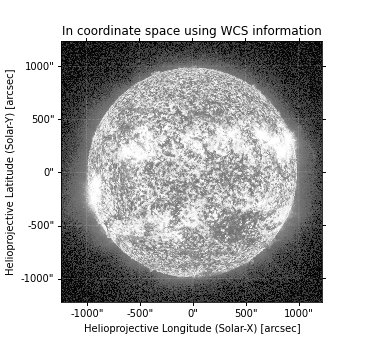
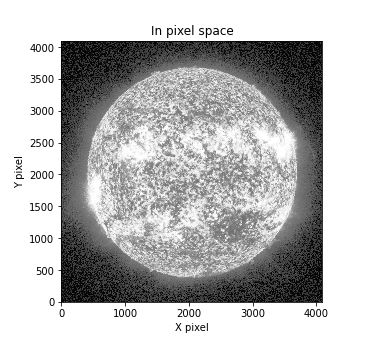
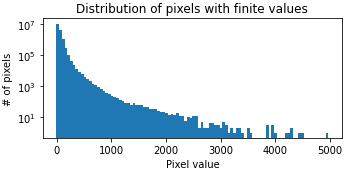

In [21]:
aia_map

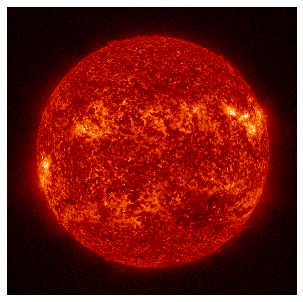

In [24]:
# Setup a frameless figure and an axes which spans the whole canvas.
figure = plt.figure(frameon=False)
axes = plt.Axes(figure, [0., 0., 1., 1.])

# Disable the axis and add them to the figure.
axes.set_axis_off()
figure.add_axes(axes)

# Plot the map without any annotations
# This might raise a warning about the axes being wrong but we can ignore this
# as we are not plotting any axes.
im = aia_map.plot(axes=axes, annotate=False, clip_interval=(1, 99.99)*u.percent)

In [26]:
im.write_png('aia.png')

# Aligning AIA and HMI Data with Reproject

In [27]:
import matplotlib.pyplot as plt
from reproject import reproject_interp

import astropy.units as u

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

In [28]:
plt.rcParams['figure.figsize'] = (16, 8)

In [29]:
time = (a.Sample(24 * u.hour) &
        a.Time(start='2010-08-19', end='2010-08-19T00:10:00', near='2010-08-19') &
        a.vso.Extent(0, 0, 0, 0, "FULLDISK"))
aia = a.Instrument.aia & a.Wavelength(17 * u.nm, 18 * u.nm)
hmi = a.Instrument.hmi & a.Physobs.los_magnetic_field

In [30]:
res = Fido.search(time, aia | hmi)

In [31]:
res

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2010-08-19 00:00:00,2010-08-19 00:00:01,SDO,AIA,FULLDISK,171.0 .. 171.0
Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2010-08-19 00:00:39,2010-08-19 00:00:40,SDO,HMI,FULLDISK,6173.0 .. 6174.0


In [35]:
# files = Fido.fetch(res[:, 0])

In [33]:
map_aia, map_hmi = [m.resample((4096, 4096)*u.pix) for m in sunpy.map.Map(sorted(files))]
# Why do we have to do this?
map_hmi.plot_settings['cmap'] = "hmimag"
map_hmi.plot_settings['norm'] = plt.Normalize(-2000, 2000)


                                                                                                          

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


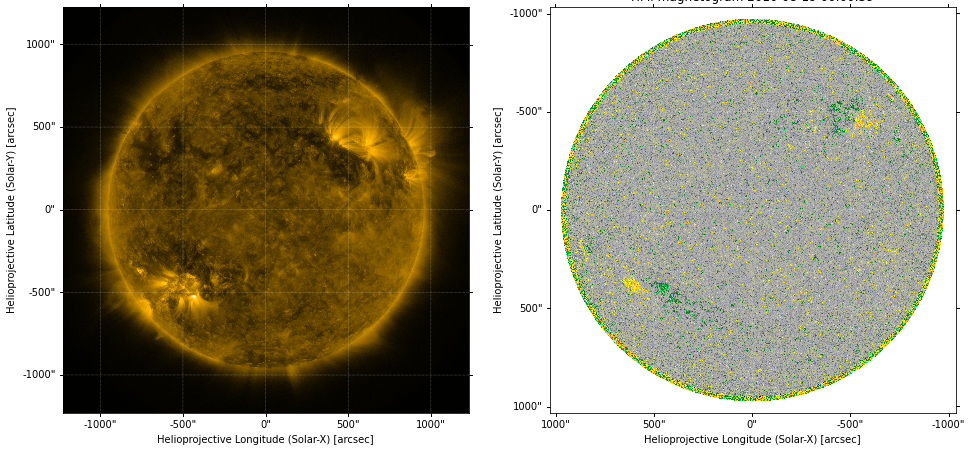

In [34]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1, projection=map_aia)
map_aia.plot(axes=ax1)

ax2 = fig.add_subplot(1, 2, 2, projection=map_hmi)
map_hmi.plot(axes=ax2)

In [36]:
output, footprint = reproject_interp(map_hmi, map_aia.wcs, map_aia.data.shape)

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
/home/ankan2791/.local/lib/python3.6/site-packages/reproject/wcs_utils.py:224: RuntimeWarning: invalid value encountered in greater
  reset |= (np.abs(inputs_check[ipix] - inputs[ipix]) > 1)
/home/ankan2791/.local/lib/python3.6/site-packages/reproject/array_utils.py:30: RuntimeWarning: invalid value encountered in less
  reset |= (coords[i] < -0.5)
/home/ankan2791/.local/lib/python3.6/site-packages/reproject/array_utils.py:31: RuntimeWarning: invalid value encountered in greater
  reset |= (coords[i] > original_shape[i] - 0.5)


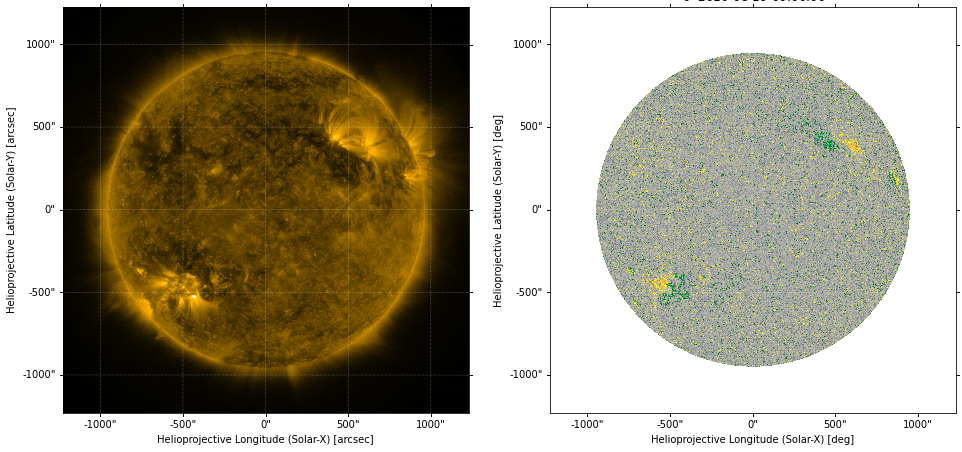

In [38]:
out_hmi = sunpy.map.Map(output, map_aia.wcs)
out_hmi.plot_settings['cmap'] = "hmimag"
out_hmi.plot_settings['norm'] = plt.Normalize(-1500, 1500)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection=map_aia)
map_aia.plot(axes=ax1)
ax2 = fig.add_subplot(1, 2, 2, projection=out_hmi)
out_hmi.plot(axes=ax2)

In [77]:
# out_hmi.save(filepath='/content/drive/My Drive/newSolarGAN/data/img', filetype='fits')

In [50]:
# how to read fits files 

from astropy.io import fits

In [57]:
hdu_list = fits.open(path + files[100])

In [58]:
hdu_list.info()

Filename: /content/drive/My Drive/newSolarGAN/data/vsoaia/aia_lev1_304a_2012_02_20t00_00_08_13z_image_lev1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 CompImageHDU    187   (4096, 4096)   int16   


In [63]:
image_data = hdu_list[1].data

In [64]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4096, 4096)


In [65]:
hdu_list.close()

In [66]:
# or
image_data = fits.getdata(path + files[100])
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4096, 4096)


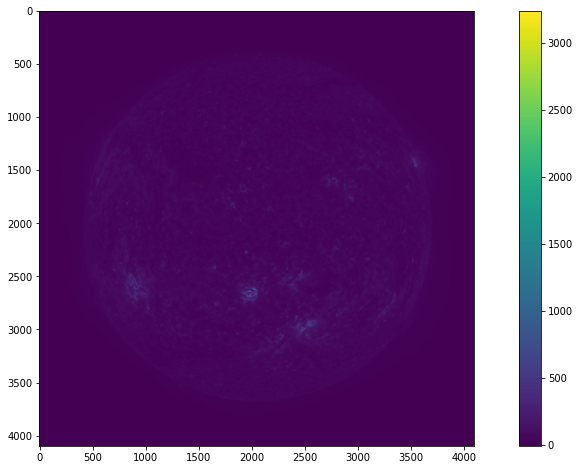

In [67]:
plt.imshow(image_data)
plt.colorbar()

# VSO hmi

In [78]:
hmi_path = "/content/drive/My Drive/newSolarGAN/data/vsohmi"
hmi_file = os.listdir(hmi_path)

In [79]:
len(hmi_file)

55

/home/ankan2791/.local/lib/python3.6/site-packages/sunpy/map/mapbase.py:290: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gray"))
  cmap.set_bad(color='red')


Observatory,
Instrument,
Detector,
Measurement,0.0
Wavelength,0.0
Observation Date,2010-08-19 00:00:00
Exposure Time,0.000000 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.00016652 0.00016652] deg / pix
Reference Pixel,[2047.5 2047.5] pix

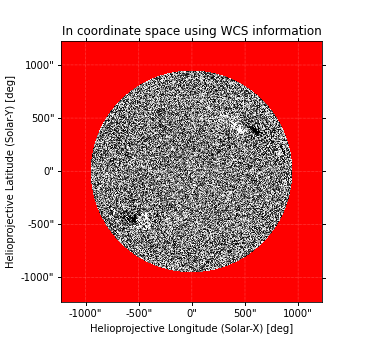
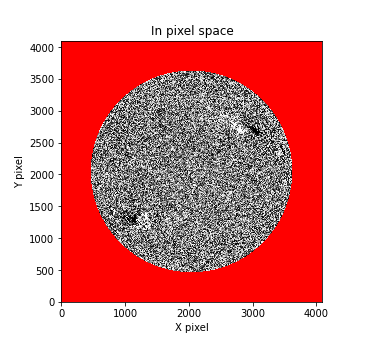
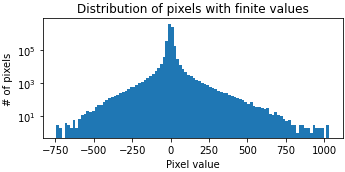

In [39]:
out_hmi